# Logistic Regression in TensorFlow (safaribooks)

In [1]:
from tqdm import tqdm
import tensorflow as tf
import numpy as np

In [2]:
np.random.seed(0)

In [3]:
data = np.load('data/data_with_labels.npz')
train = data['arr_0']/255.
labels = data['arr_1']

In [4]:
import matplotlib.pyplot as plt
plt.ion()

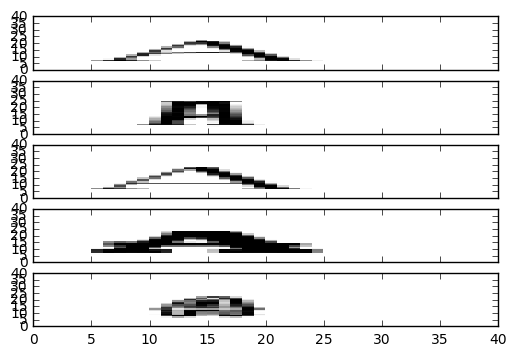

In [5]:
plt.figure(figsize=(20, 1))
f, plts = plt.subplots(5, sharex=True)
c = 91
for i in range(5):
    plts[i].pcolor(train[c + i * 558], cmap=plt.cm.gray_r)

In [6]:
def to_onehot(labels, nclasses = 5):
    '''
    Convert labels to one-hot format
    '''
    outlabels = np.zeros((len(labels), nclasses))
    for i, l in enumerate(labels):
        outlabels[i,l] = 1
    return outlabels

In [7]:
onehot = to_onehot(labels)

In [8]:
# split data into training and validation
indices = np.random.permutation(train.shape[0]) # shuffle indices
valid_cnt = int(train.shape[0] * 0.1) # use tenth of dataset for testing
test_idx, training_idx = indices[:valid_cnt], indices[valid_cnt:] # break shuffled indices
test, train = train[test_idx,:], train[training_idx,:] # break data into train and test sets
onehot_test, onehot_train = onehot[test_idx,:], onehot[training_idx,:] # break labels into train and test 

In [9]:
sess = tf.InteractiveSession()

In [10]:
# placeholders: tell TF we will supply value of this node by a feed_dict later
# input
x = tf.placeholder("float", [None, 1296])
# known labels
y_ = tf.placeholder("float", [None, 5])

# variables
W = tf.Variable(tf.zeros([1296, 5]))
b = tf.Variable(tf.zeros([5]))

# initialize variables 
sess.run(tf.initialize_all_variables())

In [11]:
# define model 
y = tf.matmul(x,W) + b

In [12]:
# define error
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y + 1e-50, y_))

In [13]:
# now we train
train_step = tf.train.GradientDescentOptimizer(0.02).minimize(cross_entropy)

In [14]:
# define accuracy
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [15]:
# actually train
epochs = 1000
train_acc = np.zeros(epochs//10)
test_acc = np.zeros(epochs//10)
for i in tqdm(range(epochs)):
    # record summary data, and the accuracy
    if i % 10 == 0:
        # check accuracy on train set
        A = accuracy.eval(feed_dict={
                x: train.reshape([-1, 1296]),
                y_: onehot_train})
        train_acc[i//10] = A
        # and now the validation set
        A = accuracy.eval(feed_dict={
                x: test.reshape([-1, 1296]),
                y_: onehot_test})
        test_acc[i//10] = A
    train_step.run(feed_dict={
            x: train.reshape([-1, 1296]),
            y_: onehot_train
        })

100%|██████████| 1000/1000 [00:15<00:00, 66.61it/s]


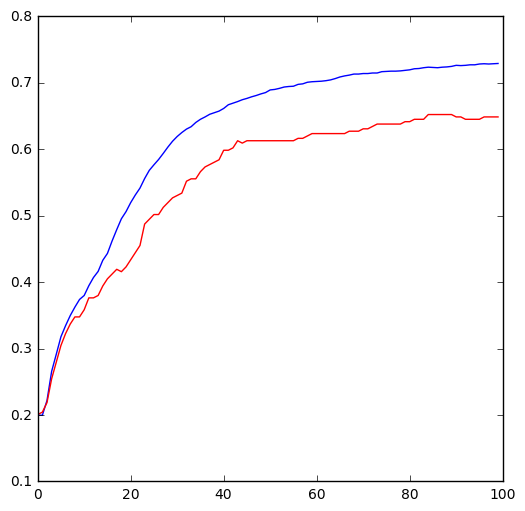

In [16]:
# plot the accuracy curves; note that the accuracy flattens out ...
plt.figure(figsize=(6,6))
plt.plot(train_acc,'b')
plt.plot(test_acc,'r')

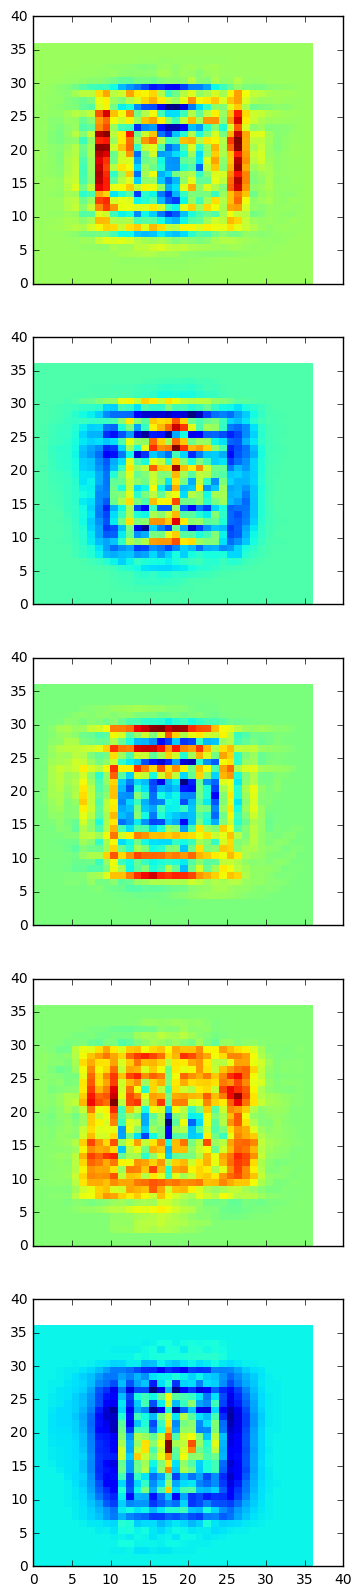

In [17]:
# look at a subplot of the weights for each font
f, plts = plt.subplots(5, sharex = True, figsize =(4,20))
for i in range(5):
    plts[i].pcolor(W.eval()[:,i].reshape([36, 36]))